# Documentation by example for `shap.plots.heatmap`

This notebook is designed to demonstrate (and so document) how to use the `shap.plots.heatmap` function. It uses an XGBoost model trained on the classic UCI adult income dataset (which is classification task to predict if people made over 50k in the 90s).

In [1]:
import xgboost
import shap

# train XGBoost model
X,y = shap.datasets.adult()
model = xgboost.XGBClassifier(nestimators=100, max_depth=2).fit(X, y)

# compute SHAP values
bg = shap.utils.sample(X, 100)
explainer = shap.Explainer(model, bg)
shap_values = explainer(X[:500])

Passing a matrix of SHAP values to the heatmap plot function creates a plot with the samples on the x-axis, the model inputs on the y-axis, and the SHAP values encoded on a color scale. The samples are ordered by default using the `shap.orders.hclust` method, which orders the samples based on a hierarchical clustering by their explanation similarity. This results in samples that have the same model output for the same reason getting grouped together (such as people with a high impact from capital gain in the plot below).

The baseline-centered output of the model is shown above the heatmap matrix, and the global importance of each model input shown as a bar plot on the right hand side of the plot (by default this is the `shap.order.abs.mean` measure of overall importance).

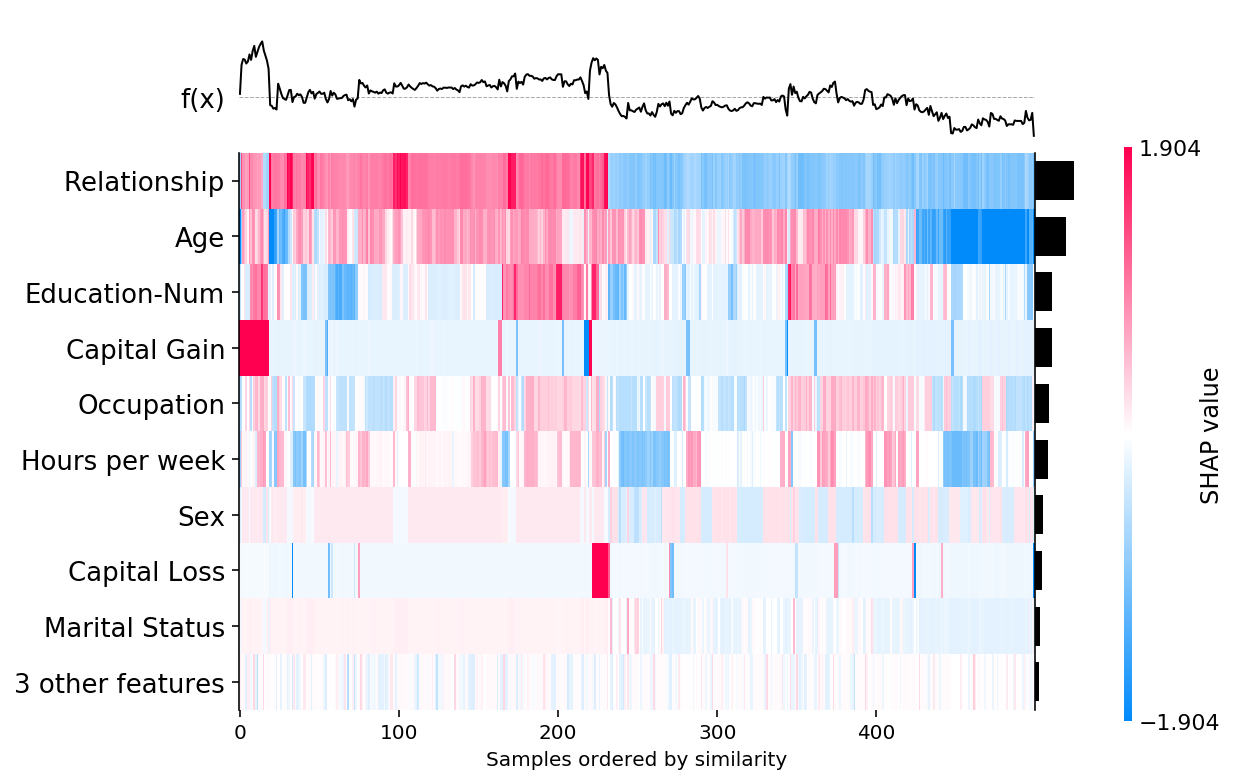

In [2]:
shap.plots.heatmap(shap_values)

Increasing the `max_display` parameter allows for more features to be shown:

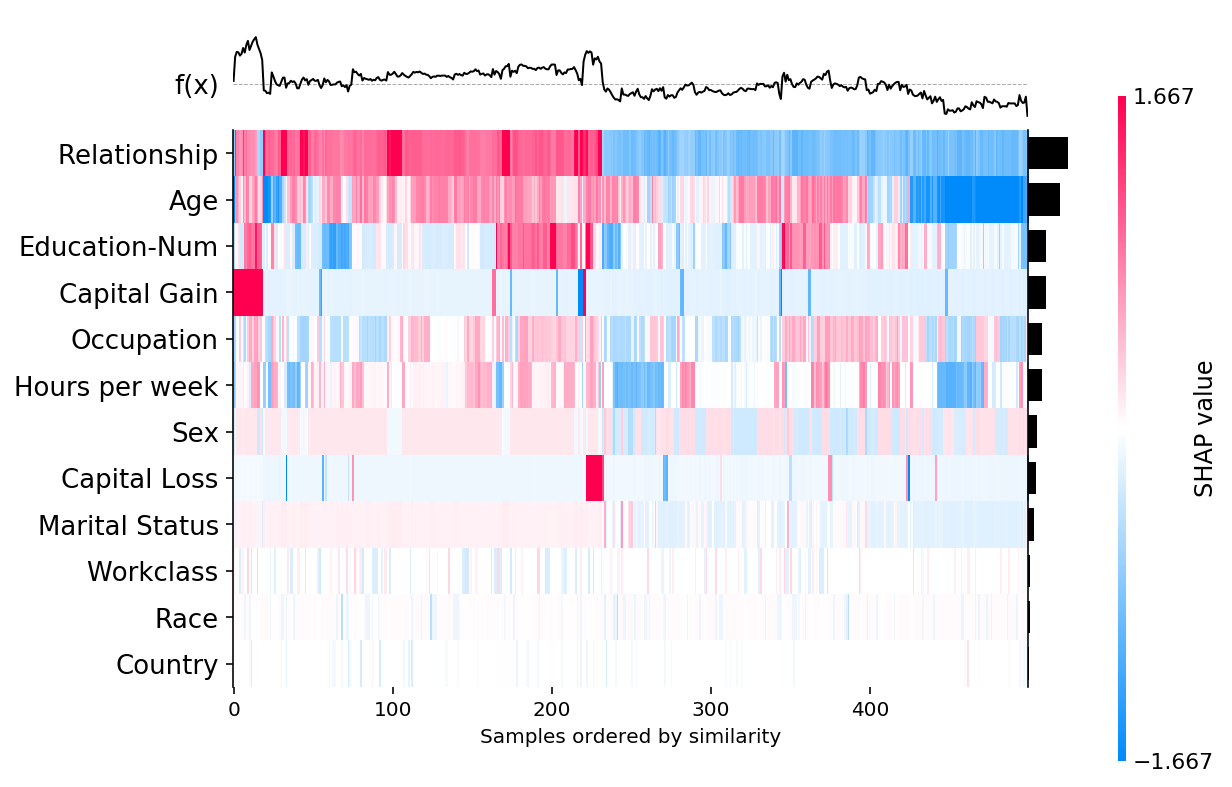

In [3]:
shap.plots.heatmap(shap_values, max_display=12)

We can change the sort ordering of the features (and the values in the right-hand bar chart) by passing any order object to the `input_order` parameter. Below we sort by the maximum absolute value of a feature over all the samples:

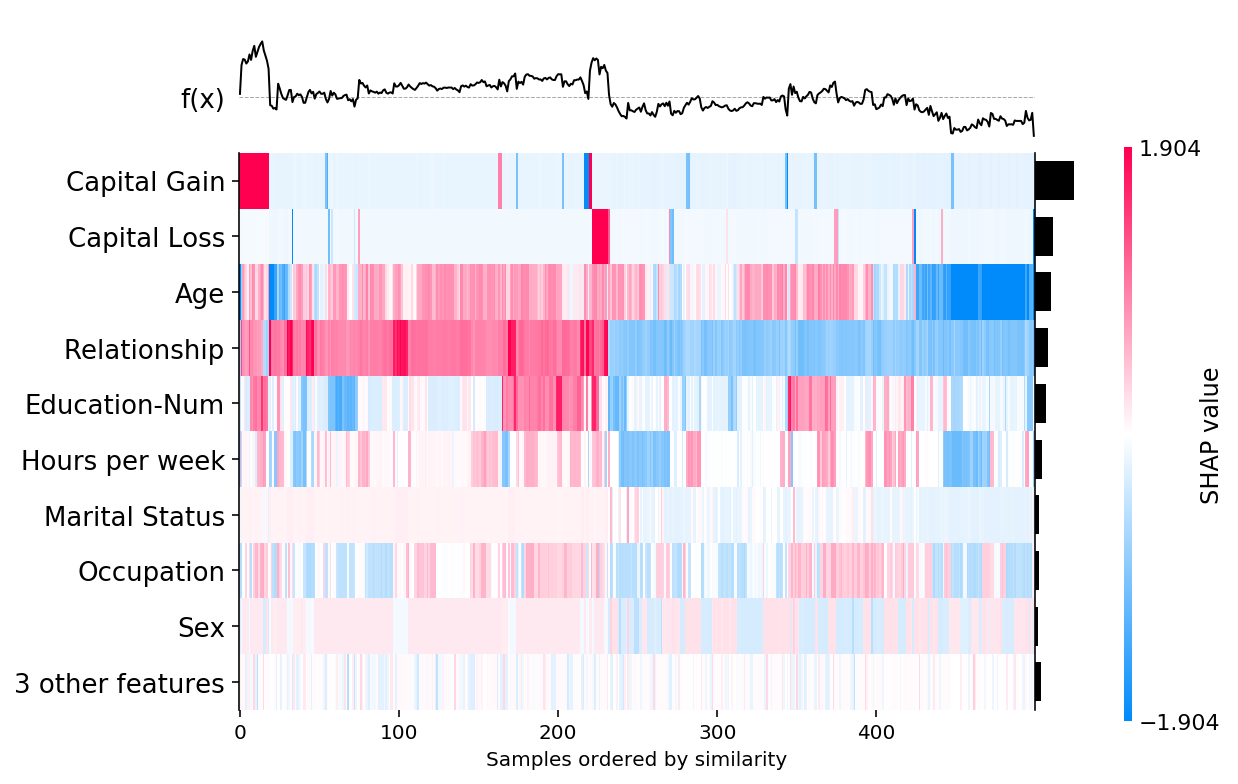

In [4]:
shap.plots.heatmap(shap_values, input_order=shap.order.abs.max)